In [210]:
# Data Science
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# plotly standard imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
# import plotly.io as pio

# Cufflinks wrapper on plotly
import cufflinks as cf

In [211]:
cf.go_offline()
# Setup Global Theme
cf.set_config_file(world_readable=True, theme='space', offline=True)

# Input Cells

In [212]:
demography = pd.read_excel('data/all.xlsx')

In [213]:
demography.drop_duplicates('ID', inplace=True)

In [214]:
demography = demography.drop('ID', axis=1)

# Favourite category

In [215]:
demography.value_counts('Favourite category').iplot(kind='barh', linecolor="black", title="Count by Category")

# Weekly income + Quality

In [216]:
demography.groupby('Favourite category').agg({
    "Weekly income": ['mean', 'median'],
    "Preferred quality": ['mean', 'median'],
    "Name": 'size'}).style.background_gradient()

In [217]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

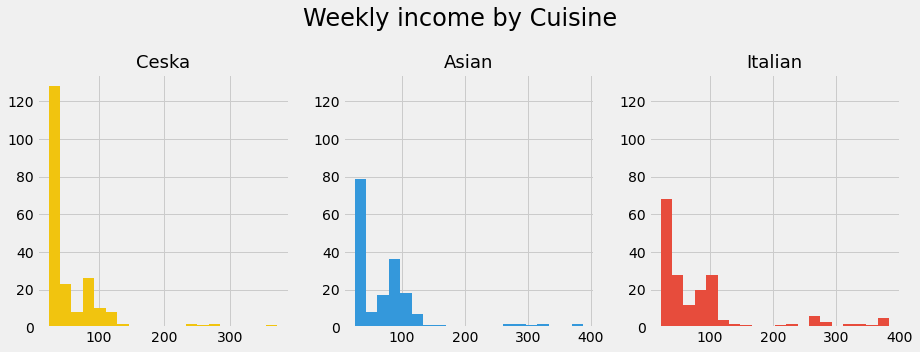

In [218]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(13,5))
plt.suptitle("Weekly income by Cuisine", fontsize=24)
ax = plt.subplot(1,3,1)

plt.hist(cz['Weekly income'], label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska', fontsize=18)

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian['Weekly income'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it['Weekly income'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.tight_layout()

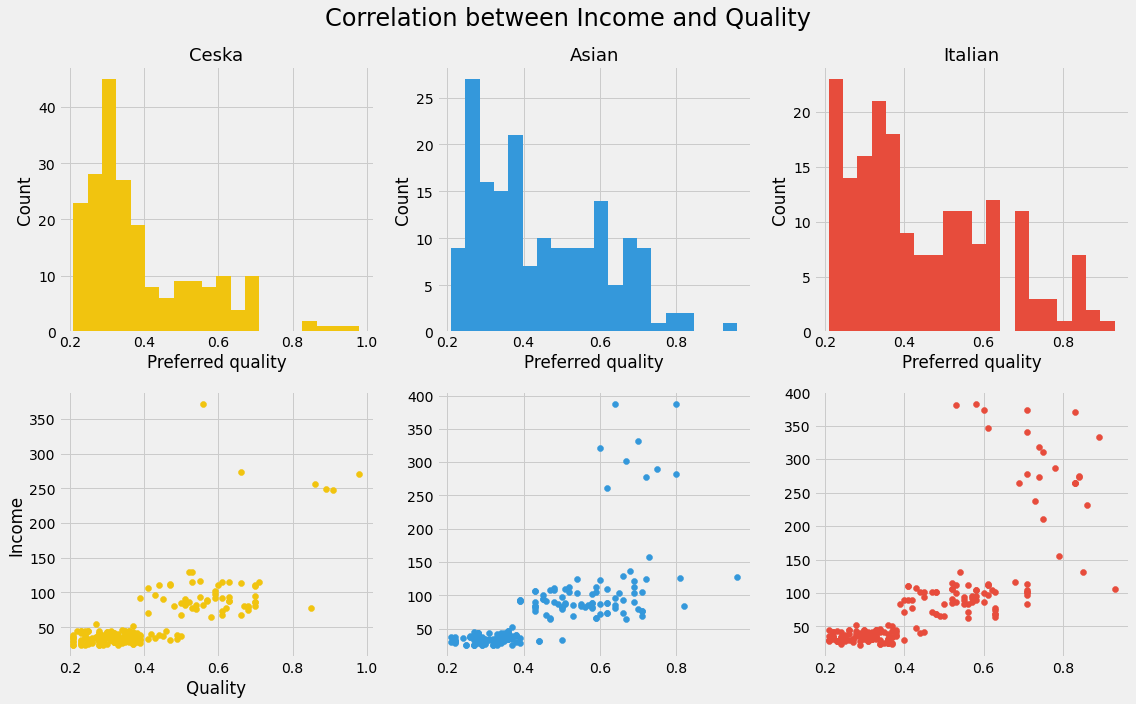

In [219]:
plt.figure(figsize=(16,10))
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

plt.subplot(2,3,1)
plt.title('Ceska', fontsize=18)
plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,4)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')
plt.xlabel('Quality')
plt.ylabel('Income')
# plt.ylim(0, 400)

plt.subplot(2,3,2)
plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,5)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(2,3,3)
plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,6)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c')
plt.tight_layout();

# Stratification by Income

In [220]:
def income_stratification(x):
    if x <= 50:
        return 'low income'
    elif 50 < x <= 150:
        return 'medium income'
    return 'high income'

In [221]:
demography['Stratification by income'] = np.vectorize(income_stratification)(demography['Weekly income'])

### Visual Count by Income

In [222]:
stratification_graph = demography.groupby(by=['Favourite category', 'Stratification by income']).size().unstack()
stratification_graph.iplot(kind='bar', linecolor="black", title="Count by Income Category")

# Ad Type

In [223]:
gbo = demography.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
gbo.iplot(kind='bar', linecolor="black", title="Count by Ad type category")

# Более точная выборка дней по кухне и рекламе [cz, asian, it]

In [224]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

In [225]:
ad = cz['Favourite ad type'] == 'promo stand big'
quality = cz['Preferred quality'].between(0.25,0.4)
weekly = cz['Weekly income'].between(30,50)

In [226]:
cz_df = cz[ad & quality & weekly]

In [227]:
top_locations = cz_df.describe(include='object')

In [228]:
top_locations.drop(['count', 'unique'], inplace=True)

In [229]:
top_locations.transpose().reset_index().drop([0,1,2,3])

,index,top,freq
4,MON 0-8h,Industrial district,20
5,MON 8-16h,Industrial district,24
6,MON 16-24h,Housing district,31
7,TUE 0-8h,Outskirts,19
8,TUE 8-16h,Industrial district,22
9,TUE 16-24h,Housing district,33
10,WED 0-8h,Industrial district,22
11,WED 8-16h,Industrial district,18
12,WED 16-24h,Housing district,18
13,THU 0-8h,Outskirts,19


In [230]:
metriki = cz_df.describe()

In [231]:
metriki.loc[['mean', '50%']].transpose()

,mean,50%
Age,51.212121,52.00
Weekly income,37.878788,37.00
Preferred quality,0.331818,0.35


# WIP

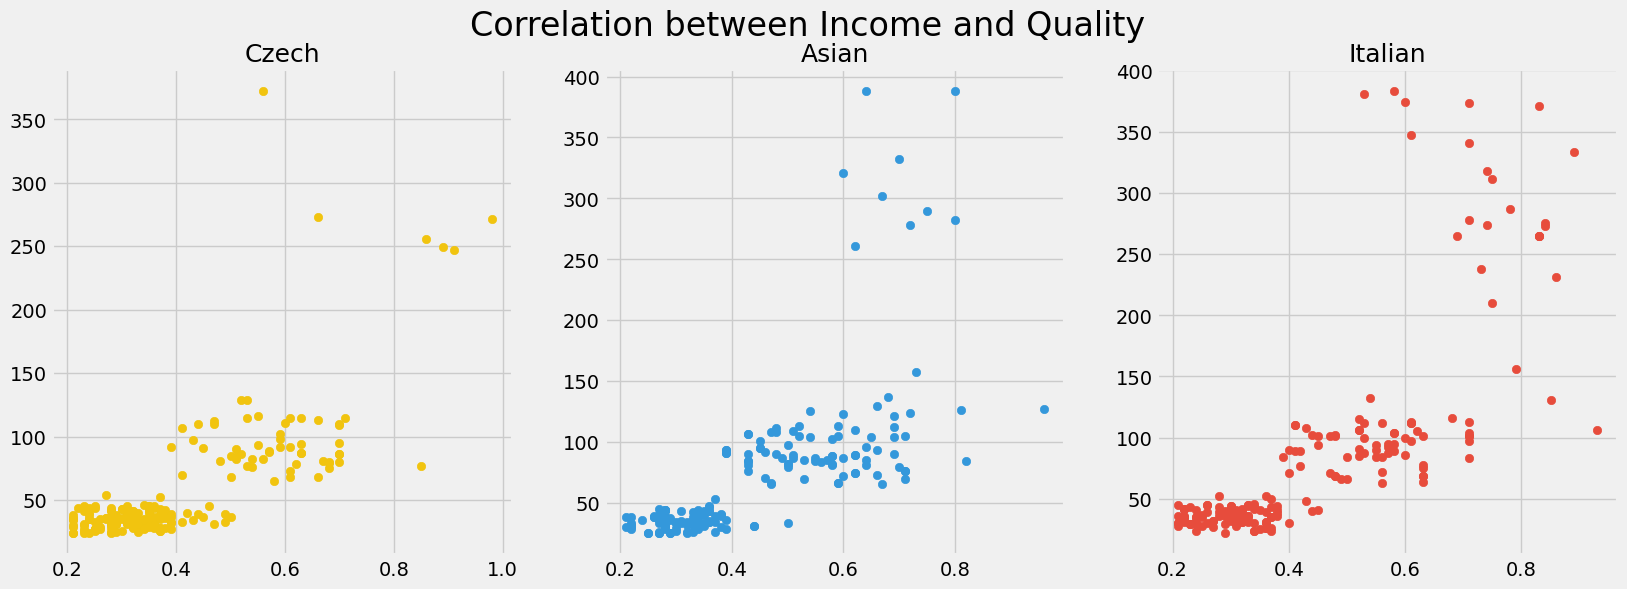

In [232]:
plt.figure(figsize=(18,6), dpi=100)
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

plt.subplot(1,3,1)
plt.title('Czech', fontsize=18)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')

plt.subplot(1,3,2)
plt.title('Asian', fontsize=18)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(1,3,3)
plt.title('Italian', fontsize=18)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c');

In [254]:
# demography.groupby('Favourite category').iplot(
#     x='Preferred quality',
#     y='Weekly income',
#     # Указываем категорию
#     mode='markers',
#     xTitle='Preferred quality',
#     yTitle='Weekly income',
#     title='Asian',
#     bestfit=True,
#     bestfit_colors=["blue"])

AttributeError: 'DataFrameGroupBy' object has no attribute 'unstack'

# New Method

In [234]:
medium_italian = it[it['Stratification by income'] == 'medium income']
medium_italian.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)

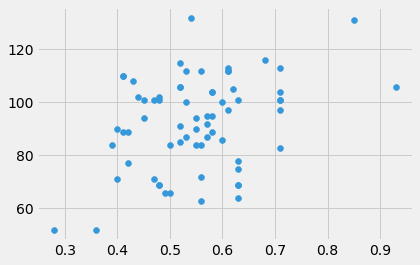

In [235]:
plt.scatter(medium_italian['Preferred quality'], medium_italian['Weekly income'], label='Asian', color='#3498db')

In [236]:
medium_italian['Favourite ad type'].value_counts()

promo stand big          25
citylight                12
print-on-bus             10
Built-up                  8
billboard                 4
promo stand small         4
hostess on the street     2
radio spot                1
flyer distribution        1
Outskirts                 1
Name: Favourite ad type, dtype: int64

In [237]:
medium_asian = asian[asian['Stratification by income'] == 'medium income']
medium_asian.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)

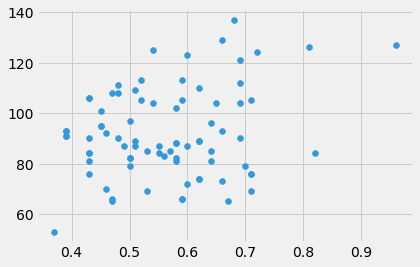

In [238]:
plt.scatter(medium_asian['Preferred quality'], medium_asian['Weekly income'], label='Asian', color='#3498db')

In [240]:
medium_asian['Favourite ad type'].value_counts()

promo stand big          37
print-on-bus             10
citylight                 9
hostess on the street     8
billboard                 7
Built-up                  6
Outskirts                 2
promo stand small         1
Name: Favourite ad type, dtype: int64

In [241]:
options = ['promo stand big']

In [242]:
medium_asian= medium_asian[medium_asian['Favourite ad type'].isin(options)]

In [243]:
medium_asian = medium_asian.describe(include='object').drop(['count', 'unique'])

In [244]:
medium_asian.transpose()

,top,freq
Favourite ad type,promo stand big,37
MON 0-8h,Office district,34
MON 8-16h,Office district,21
MON 16-24h,Park,16
TUE 0-8h,Office district,35
TUE 8-16h,Office district,21
TUE 16-24h,Park,21
WED 0-8h,Office district,22
WED 8-16h,Historical center,18
WED 16-24h,Park,21


In [246]:
# Посчитать количество людей всего по месту
# Наложить на них аккамулярующий график с рекламами

In [247]:
demography.groupby(['Favourite category', 'Stratification by income']).size()

Favourite category  Stratification by income
Asian cuisine       high income                  10
                    low income                   86
                    medium income                80
Czech cuisine       high income                   6
                    low income                  149
                    medium income                56
Italian cuisine     high income                  23
                    low income                   94
                    medium income                68
dtype: int64

In [248]:
demography.groupby(['Favourite category', 'Stratification by income']).median()

Age  Weekly income  \
Favourite category Stratification by income                        
Asian cuisine      high income               49.5          296.0   
                   low income                57.0           34.0   
                   medium income             57.0           89.0   
Czech cuisine      high income               48.5          263.5   
                   low income                48.0           35.0   
                   medium income             48.0           87.5   
Italian cuisine    high income               55.0          278.0   
                   low income                53.0           35.0   
                   medium income             48.5           94.5   

                                             Preferred quality  
Favourite category Stratification by income                     
Asian cuisine      high income                           0.710  
                   low income                            0.300  
                   medium income                         0.565  
Czech cuisine      high income                           0.875  
                   low income                            0.310  
                   medium income                         0.575  
Italian cuisine    high income                           0.750  
                   low income                            0.310  
                   medium income                         0.550

In [249]:
it['MON 16-24h'].value_counts().reset_index().transpose()

,0,1,2,3,4,5,6,7,8
index,Housing district,Park,Office district,Outskirts,City center,Historical center,Built-up,Riverfront,University campus
MON 16-24h,110,25,12,10,10,7,7,3,1


In [250]:
it

,Name,Age,Gender,Weekly income,Preferred quality,Favourite category,Favourite ad type,MON 0-8h,MON 8-16h,MON 16-24h,...,FRI 0-8h,FRI 8-16h,FRI 16-24h,SAT 0-8h,SAT 8-16h,SAT 16-24h,SUN 0-8h,SUN 8-16h,SUN 16-24h,Stratification by income
0,JJ,80,Female,28,0.25,Italian cuisine,promo stand big,Outskirts,Industrial district,Housing district,...,Outskirts,Outskirts,Park,Outskirts,Outskirts,Housing district,Outskirts,Outskirts,Housing district,low income
6,BZ,47,Female,35,0.22,Italian cuisine,hostess on the street,Industrial district,Outskirts,Housing district,...,Outskirts,Outskirts,Housing district,Industrial district,Industrial district,Park,Industrial district,Outskirts,Housing district,low income
16,JZ,47,Female,26,0.36,Italian cuisine,print-on-bus,Outskirts,Outskirts,Housing district,...,Outskirts,Industrial district,Park,Industrial district,Outskirts,Park,Industrial district,Outskirts,Housing district,low income
19,PH,89,Male,72,0.56,Italian cuisine,promo stand big,Office district,Park,Park,...,Office district,Historical center,Office district,Office district,Historical center,Housing district,Office district,Historical center,Housing district,medium income
24,EG,27,Female,44,0.33,Italian cuisine,promo stand small,Outskirts,Outskirts,Housing district,...,Industrial district,Industrial district,Park,Outskirts,Outskirts,Housing district,Outskirts,Outskirts,Housing district,low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,LU,28,Female,91,0.52,Italian cuisine,Built-up,City center,City center,City center,...,Built-up,City center,Outskirts,City center,Outskirts,Outskirts,Built-up,City center,NaN,medium income
558,TB,15,Male,38,0.30,Italian cuisine,Built-up,Built-up,Outskirts,Built-up,...,Outskirts,Built-up,Built-up,Outskirts,City center,Built-up,Outskirts,Built-up,NaN,low income
559,CF,33,Male,318,0.74,Italian cuisine,Outskirts,City center,Outskirts,City center,...,City center,Outskirts,City center,Outskirts,Outskirts,Outskirts,City center,Built-up,NaN,high income
566,UC,62,Female,311,0.75,Italian cuisine,Outskirts,City center,Outskirts,City center,...,City center,City center,City center,Outskirts,Outskirts,Outskirts,City center,Outskirts,NaN,high income


In [251]:
it.groupby('Favourite ad type').agg({"Weekly income": ['mean', 'median'], "Preferred quality": ['mean', 'median'],
                                     "Name": 'size'})

Weekly income        Preferred quality        Name
                               mean median              mean median size
Favourite ad type                                                       
Built-up                  70.833333   84.0          0.468333  0.535   12
City center              274.000000  274.0          0.840000  0.840    2
Outskirts                219.333333  280.5          0.640000  0.740    6
billboard                218.857143  251.5          0.676429  0.710   14
citylight                 61.466667   44.0          0.415667  0.370   30
flyer distribution        52.000000   52.0          0.360000  0.360    1
hostess on the street    126.083333   33.5          0.447500  0.360   12
print-on-bus              56.200000   39.5          0.400000  0.365   30
promo stand big           71.809524   45.0          0.413175  0.380   63
promo stand small         65.000000   42.0          0.396429  0.360   14
radio spot               100.000000  100.0          0.600000  0.600    1